# załadowanie danych

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
db_markets = pd.read_csv('supermarket_sales - Sheet1.csv')
db_markets.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [15]:
#dodaje kolumny miesiecy godzin oraz dni
db_markets['Date']
db_markets['Month']=db_markets['Date'].apply(lambda x :x.split('/')[0])
db_markets['Day']=db_markets['Date'].apply(lambda x :x.split('/')[1])
db_markets['Hour']=db_markets['Time'].apply(lambda x :x.split(':')[0])

db_markets

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,5,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,3,8,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,27,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,1,29,13
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,3,2,17
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,2,9,13
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,2,22,15


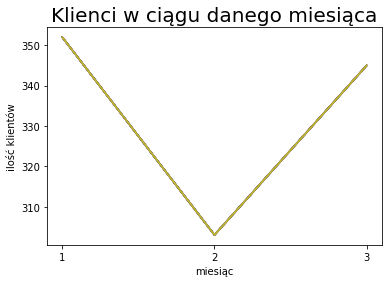

In [18]:
#sprawdzenie ilości klientów po miesiącach
month_results=db_markets.groupby('Month').count()

months=range(1,4)
plt.plot(months,month_results)

plt. title('Klienci w ciągu danego miesiąca',fontdict={'fontsize':20})
plt.xlabel('miesiąc')
plt.ylabel('ilość klientów')
plt.xticks([1,2,3])

plt.savefig('grafy/klient_miesiac.png',dpi=300)


plt.show()


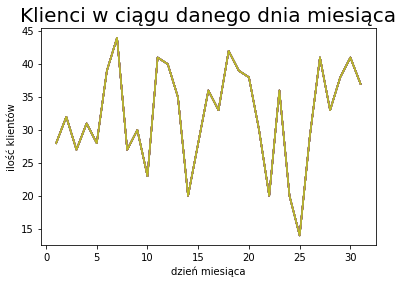

In [20]:
#sprawdzanie ilości klientów po dniach
day_results=db_markets.groupby('Day').count()
days=range(1,32)
plt.plot(days,day_results)
plt. title('Klienci w ciągu danego dnia miesiąca',fontdict={'fontsize':20})
plt.xlabel('dzień miesiąca')
plt.ylabel('ilość klientów')


plt.savefig('grafy/klient_dzien_miesiaca.png',dpi=300)
plt.show()

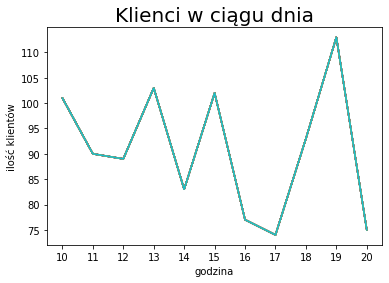

In [28]:
#sprawdzanie ilości klientów po godzinach

hour_results=db_markets.groupby('Hour').count()
hours=[hour for hour, df in db_markets.groupby('Hour')]

plt. title('Klienci w ciągu dnia',fontdict={'fontsize':20})
plt.xlabel('godzina')
plt.ylabel('ilość klientów')


plt.plot(hours,hour_results)
plt.savefig('grafy/klient_dzien.png',dpi=300)


plt.show()

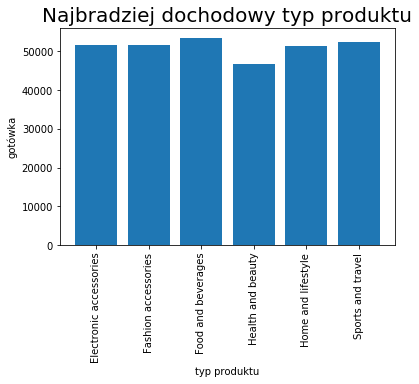

In [23]:
# najbardziej dochodowy product line

db_markets['all_purchases']=db_markets['Unit price']*db_markets['Quantity']
results=db_markets.groupby('Product line')['all_purchases'].sum()
results

product_lines=[product_line for product_line, df in db_markets.groupby('Product line')]



plt.bar(product_lines,results)

plt. title('Najbradziej dochodowy typ produktu',fontdict={'fontsize':20})
plt.xlabel('typ produktu')
plt.ylabel('gotówka')

plt.xticks(product_lines,rotation='vertical')



plt.savefig('grafy/top_product_line.png',bbox_inches="tight",dpi=300)

plt.show()

In [100]:
results


Product line
Electronic accessories    51750.03
Fashion accessories       51719.90
Food and beverages        53471.28
Health and beauty         46851.18
Home and lifestyle        51297.06
Sports and travel         52497.93
Name: all_purchases, dtype: float64

# porównanie kobiet i mężczyzn

In [25]:
#podział na kobiety i mężczyzn
male=db_markets.loc[db_markets['Gender']=='Male']
female=db_markets.loc[db_markets['Gender']=='Female']

#podział na customer type

male_type=male.groupby('Customer type')['Gender'].count()
female_type=female.groupby('Customer type')['Gender'].count()

#podział na product line
male_product=male.groupby('Product line')['Gender'].count()
female_product=female.groupby('Product line')['Gender'].count()

male_type


Customer type
Member    240
Normal    259
Name: Gender, dtype: int64

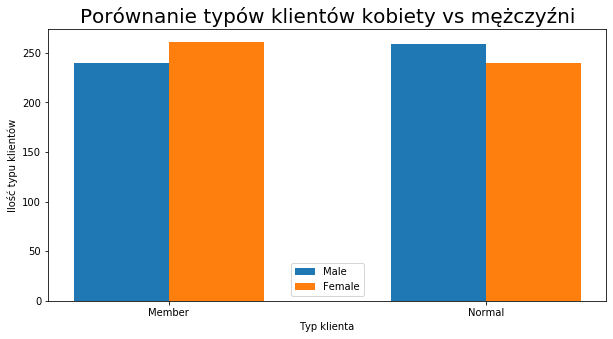

In [27]:
#wykresy

customer_types=[customer_type for customer_type, df in db_markets.groupby('Customer type')]

#liczba parowanych wykresów 
N=2


#pozycja na x

ind = np.arange(N)

#rozmiar
plt.figure(figsize=(10,5))

#grubość kolumny
width=0.3

#rysowanie

plt.bar(ind,male_type,width,label='Male')
plt.bar(ind+width,female_type,width,label='Female')

plt.xlabel('Typ klienta')
plt.ylabel('Ilość typu klientów')
plt.title('Porównanie typów klientów kobiety vs mężczyźni',fontdict={'fontsize':20})


plt.xticks(ind + width / 2, (customer_types))


plt.legend(loc='best')

plt.savefig('grafy/klienci_typ.png',bbox_inches="tight",dpi=300)
plt.show()

Product line
Electronic accessories    86
Fashion accessories       82
Food and beverages        84
Health and beauty         88
Home and lifestyle        81
Sports and travel         78
Name: Gender, dtype: int64

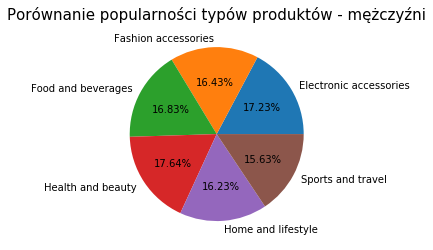

In [31]:
#mężczyźni

labels=[product_type for product_type, df in db_markets.groupby('Product line')]

plt.pie(male_product,labels =labels, autopct = '%.2f%%' )
plt.title('Porównanie popularności typów produktów - mężczyźni',fontdict={'fontsize':15})
plt.savefig('grafy/male_top_product_line.png',bbox_inches="tight",dpi=300)
plt.show
male_product

Product line
Electronic accessories    84
Fashion accessories       96
Food and beverages        90
Health and beauty         64
Home and lifestyle        79
Sports and travel         88
Name: Gender, dtype: int64

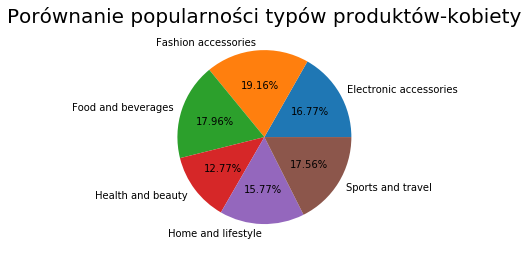

In [32]:
#kobiety
labels=[product_type for product_type, df in db_markets.groupby('Product line')]

plt.pie(female_product,labels =labels, autopct = '%.2f%%' )
plt.title('Porównanie popularności typów produktów-kobiety',fontdict={'fontsize':20})
plt.savefig('grafy/female_top_product_line.png',bbox_inches="tight",dpi=300)
plt.show
female_product

# Miasta dochodowość

In [34]:
#miasta dochodowość

results2=db_markets.groupby('City')['all_purchases'].sum()
cities=[city for city, df in db_markets.groupby('City')]




results2

City
Mandalay     101140.64
Naypyitaw    105303.53
Yangon       101143.21
Name: all_purchases, dtype: float64

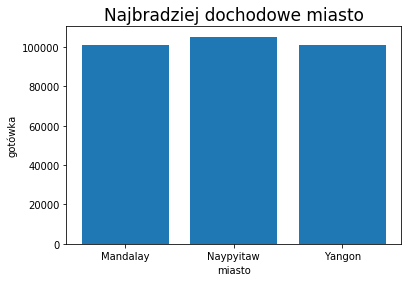

In [36]:
plt.bar(cities,results2)
plt. title('Najbradziej dochodowe miasto',fontdict={'fontsize':17})
plt.xlabel('miasto')
plt.ylabel('gotówka')

plt.savefig('grafy/top_city.png',bbox_inches="tight",dpi=300)

plt.show()